In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import timeit ## running time 측정용 패키지 
tic=timeit.default_timer()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

8.911400027500349e-05

In [3]:
os.getcwd()

'C:\\Users\\tkim29\\dacon_kbo'

In [103]:
preseason_batter = pd.read_csv('../dacon_kbo/Pre_Season_Batter.csv',encoding='utf-8')
regular_season = pd.read_csv('../dacon_kbo/Regular_Season_Batter.csv',encoding='utf-8')

In [104]:
preseason_batter.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [105]:
pre_df1 = pd.DataFrame(preseason_batter)

In [116]:
pre_df1.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

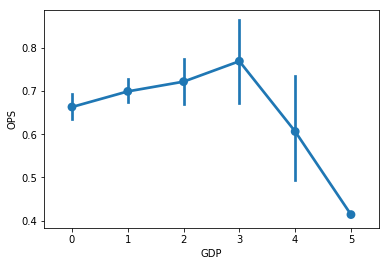

In [126]:
sns.pointplot(x="GDP", y="OPS", data=pre_df1)

In [33]:
pre_df1_groupby_mean = pre_df1.groupby(pre_df1['batter_name']).mean()

In [34]:
pre_df1_groupby_mean.head()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
batter_name,,,,,,,,,,,,,,,,,,,,,
가르시아,0.0,2018.000000,7.000000,20.000000,1.000000,7.000000,1.000000,0.000000,1.000000,11.000000,...,0.000000,0.000000,2.000000,0.0,3.000000,1.000000,0.550000,0.409000,1.000000,0.959000
강경학,1.0,2014.600000,8.600000,18.600000,4.200000,3.400000,0.200000,0.200000,0.400000,5.200000,...,0.800000,0.600000,1.400000,0.8,6.000000,0.000000,0.200000,0.320000,0.600000,0.520000
강구성,2.0,2015.333333,2.666667,2.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,...,0.333333,0.000000,0.333333,0.0,0.000000,0.666667,0.333333,0.500000,0.000000,0.833333
강민국,3.0,2015.000000,9.000000,10.000000,1.333333,2.333333,1.000000,0.333333,0.000000,4.000000,...,0.000000,0.000000,0.666667,0.0,3.000000,0.000000,0.242000,0.160333,0.000000,0.402333
강민호,4.0,2011.500000,8.071429,17.285714,2.500000,4.285714,0.857143,0.071429,0.857143,7.857143,...,0.000000,0.142857,1.500000,0.5,3.785714,0.571429,0.427929,0.304429,0.071429,0.732357


In [87]:
pre_df1_groupby_mean['3B'].isna().sum()

0

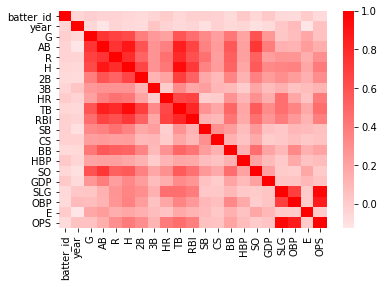

In [95]:
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(pre_df1.corr(), annot=False, cmap=cmap)

In [89]:
feature_names = ["3B"]
                        
feature_names

['3B']

In [90]:
label_name = "OPS"
label_name

'OPS'

In [91]:
X_train = pre_df1_groupby_mean[feature_names]

print(X_train.shape)

X_train.head()

(229, 1)


,3B
batter_name,
가르시아,0.000000
강경학,0.200000
강구성,0.000000
강민국,0.333333
강민호,0.071429


In [92]:
y_train = pre_df1_groupby_mean[label_name]

print(y_train.shape)

y_train.head()

(229,)


batter_name
가르시아    0.959000
강경학     0.520000
강구성     0.833333
강민국     0.402333
강민호     0.732357
Name: OPS, dtype: float64

In [93]:
import numpy as np

from sklearn.metrics import make_scorer


def rmsle(predict, actual):

    predict = np.array(predict)
    actual = np.array(actual)

    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    

    distance = log_predict - log_actual
    

    square_distance = distance ** 2
    

    mean_square_distance = square_distance.mean()
    
 
    score = np.sqrt(mean_square_distance)
    

    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)